### Predict loan defaulters. 
Build a model to determine whether a loan will default, as well as the loss incurred if it does default. 
The given dataset is already standardized/normalized. Target variable is "loss" on the scale of (0-100)
1. Predict loan defaulters- logistic regression
2. Rate the customer in terms of loss-linear regression

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling

In [3]:
data=pd.read_csv('train_v2.csv')
data.head(5)

C:\Users\91954\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (135,204,274,417) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
0,1,126,10,0.686842,1100,3,13699,7201.0,4949.0,126.75,...,5,2.14,-1.54,1.18,0.1833,0.7873,1,0,5,0
1,2,121,10,0.782776,1100,3,84645,240.0,1625.0,123.52,...,6,0.54,-0.24,0.13,0.1926,-0.6787,1,0,5,0
2,3,126,10,0.500080,1100,3,83607,1800.0,1527.0,127.76,...,13,2.89,-1.73,1.04,0.2521,0.7258,1,0,5,0
3,4,134,10,0.439874,1100,3,82642,7542.0,1730.0,132.94,...,4,1.29,-0.89,0.66,0.2498,0.7119,1,0,5,0
4,5,109,9,0.502749,2900,4,79124,89.0,491.0,122.72,...,26,6.11,-3.82,2.51,0.2282,-0.5399,0,0,5,0


### Exploratory data analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105471 entries, 0 to 105470
Columns: 771 entries, id to loss
dtypes: float64(653), int64(99), object(19)
memory usage: 620.4+ MB


In [5]:
data.shape

(105471, 771)

#### Check class imbalance

In [10]:
data["default"]=np.where(data["loss"]>0,1,0)
data.shape

(105471, 772)

In [15]:
len(data[data["default"]==1]),len(data[data["default"]==0])

(9783, 95688)

In [16]:
# Dataset for defaulters
d1=data[data["default"]==1]

In [18]:
# Dataset for reliable customers
d2=data[data["default"]==0]
d2.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f771,f772,f773,f774,f775,f776,f777,f778,loss,default
0,1,126,10,0.686842,1100,3,13699,7201.0,4949.0,126.75,...,2.14,-1.54,1.18,0.1833,0.7873,1,0,5,0,0
1,2,121,10,0.782776,1100,3,84645,240.0,1625.0,123.52,...,0.54,-0.24,0.13,0.1926,-0.6787,1,0,5,0,0
2,3,126,10,0.500080,1100,3,83607,1800.0,1527.0,127.76,...,2.89,-1.73,1.04,0.2521,0.7258,1,0,5,0,0
3,4,134,10,0.439874,1100,3,82642,7542.0,1730.0,132.94,...,1.29,-0.89,0.66,0.2498,0.7119,1,0,5,0,0
4,5,109,9,0.502749,2900,4,79124,89.0,491.0,122.72,...,6.11,-3.82,2.51,0.2282,-0.5399,0,0,5,0,0


In [366]:
d3=d2.truncate(before=0,after=12000,axis=0)
d3

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f771,f772,f773,f774,f775,f776,f777,f778,loss,default
0,1,126,10,0.686842,1100,3,13699,7201.0,4949.0,126.75,...,2.14,-1.54,1.18,0.1833,0.7873,1,0,5,0,0
1,2,121,10,0.782776,1100,3,84645,240.0,1625.0,123.52,...,0.54,-0.24,0.13,0.1926,-0.6787,1,0,5,0,0
2,3,126,10,0.500080,1100,3,83607,1800.0,1527.0,127.76,...,2.89,-1.73,1.04,0.2521,0.7258,1,0,5,0,0
3,4,134,10,0.439874,1100,3,82642,7542.0,1730.0,132.94,...,1.29,-0.89,0.66,0.2498,0.7119,1,0,5,0,0
4,5,109,9,0.502749,2900,4,79124,89.0,491.0,122.72,...,6.11,-3.82,2.51,0.2282,-0.5399,0,0,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,119,10,0.641168,2500,4,3793,149.0,656.0,126.51,...,9.54,-6.60,4.79,0.2702,0.4870,0,0,104,0,0
11996,11997,131,10,0.616498,2500,4,9290,75.0,47.0,129.44,...,2.75,-2.08,1.64,0.1835,-0.8757,0,0,104,0,0
11998,11999,120,10,0.515389,2500,4,14234,148.0,3839.0,116.89,...,5.79,-3.71,2.59,0.2448,-0.3809,0,0,104,0,0
11999,12000,122,10,0.460538,2500,4,78920,11.0,3566.0,122.07,...,2.54,-1.56,0.99,0.2268,-0.3243,0,0,104,0,0


In [367]:
df=d3.append(d1)
df.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f771,f772,f773,f774,f775,f776,f777,f778,loss,default
0,1,126,10,0.686842,1100,3,13699,7201.0,4949.0,126.75,...,2.14,-1.54,1.18,0.1833,0.7873,1,0,5,0,0
1,2,121,10,0.782776,1100,3,84645,240.0,1625.0,123.52,...,0.54,-0.24,0.13,0.1926,-0.6787,1,0,5,0,0
2,3,126,10,0.500080,1100,3,83607,1800.0,1527.0,127.76,...,2.89,-1.73,1.04,0.2521,0.7258,1,0,5,0,0
3,4,134,10,0.439874,1100,3,82642,7542.0,1730.0,132.94,...,1.29,-0.89,0.66,0.2498,0.7119,1,0,5,0,0
4,5,109,9,0.502749,2900,4,79124,89.0,491.0,122.72,...,6.11,-3.82,2.51,0.2282,-0.5399,0,0,5,0,0


In [368]:
df=df.iloc[:,1:772]
df.head(2)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f771,f772,f773,f774,f775,f776,f777,f778,loss,default
0,126,10,0.686842,1100,3,13699,7201.0,4949.0,126.75,126.03,...,2.14,-1.54,1.18,0.1833,0.7873,1,0,5,0,0
1,121,10,0.782776,1100,3,84645,240.0,1625.0,123.52,121.35,...,0.54,-0.24,0.13,0.1926,-0.6787,1,0,5,0,0


In [369]:
df.groupby(["default"])[["default"]].count()

,default
default,
0,10959
1,9783


In [370]:
cat=df.select_dtypes(include=['object'])
cat.shape[1]

19

In [371]:
num=df.select_dtypes(exclude=["object"])
num.shape[1]

752

### Convert categorical into numeric

In [372]:
for c in cat.columns:
    cat[c] = pd.to_numeric(cat[c], errors='coerce')

<ipython-input-372-e0ccdffe708b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat[c] = pd.to_numeric(cat[c], errors='coerce')


In [373]:
cat.dtypes

f137    float64
f138    float64
f206    float64
f207    float64
f276    float64
f277    float64
f338    float64
f390    float64
f391    float64
f419     uint64
f420    float64
f469    float64
f472    float64
f534    float64
f537    float64
f626    float64
f627    float64
f695    float64
f698    float64
dtype: object

In [374]:
cat.f419

0           137000000000
1                9483264
2            36051866452
3             5621900678
4           279000000000
               ...      
105424      183000000000
105430    11500000000000
105440      754000000000
105456       71317466325
105463    27600000000000
Name: f419, Length: 20742, dtype: uint64

In [375]:
cat.f419=cat.f419.astype(np.int64)

C:\Users\91954\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [376]:
cat.f419.dtype

dtype('int64')

In [377]:
df=pd.concat([cat,num],axis=1)
df.head()

,f137,f138,f206,f207,f276,f277,f338,f390,f391,f419,...,f771,f772,f773,f774,f775,f776,f777,f778,loss,default
0,8.090000e+15,7.544851e+20,3.200000e+12,3.860000e+16,7.900000e+15,6.830914e+20,7.610000e+12,1.037016e+28,1.362114e+37,137000000000,...,2.14,-1.54,1.18,0.1833,0.7873,1,0,5,0,0
1,2.250000e+12,1.530000e+16,3.920000e+11,1.690000e+15,9.230000e+13,2.140000e+18,7.965942e+08,5.098138e+27,5.366155e+36,9483264,...,0.54,-0.24,0.13,0.1926,-0.6787,1,0,5,0,0
2,1.860000e+14,6.910365e+18,2.370000e+13,3.890000e+17,1.030000e+13,6.920000e+16,4.610000e+11,2.640027e+28,3.611703e+37,36051866452,...,2.89,-1.73,1.04,0.2521,0.7258,1,0,5,0,0
3,4.450000e+16,1.122519e+22,1.609851e+10,3.500000e+13,2.220000e+13,2.950000e+17,1.330000e+12,9.333818e+27,1.263853e+37,5621900678,...,1.29,-0.89,0.66,0.2498,0.7119,1,0,5,0,0
4,5.215293e+10,1.080000e+14,4.420000e+11,1.870000e+15,3.630000e+12,2.310000e+16,2.240000e+12,1.960047e+29,4.282133e+38,279000000000,...,6.11,-3.82,2.51,0.2282,-0.5399,0,0,5,0,0


In [378]:
df.drop(["loss"],axis=1,inplace=True)

In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20742 entries, 0 to 105463
Columns: 770 entries, f137 to default
dtypes: float64(671), int32(1), int64(98)
memory usage: 121.9 MB


In [380]:
df.describe().round(2)

,f137,f138,f206,f207,f276,f277,f338,f390,f391,f419,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,default
count,2.070900e+04,2.070900e+04,2.049900e+04,2.049900e+04,2.072400e+04,2.072400e+04,2.074200e+04,2.065000e+04,2.065000e+04,2.074200e+04,...,20742.00,20742.00,20742.00,20742.00,20543.00,20479.00,20742.00,20742.00,20742.00,20742.00
mean,3.898101e+17,6.253877e+23,3.027804e+17,5.872337e+23,3.401128e+17,5.720475e+23,1.517915e+20,9.260671e+29,6.084916e+39,7.311725e+15,...,17.21,5.84,-4.29,3.31,0.23,0.03,0.30,0.26,142.75,0.47
std,3.375474e+18,6.128635e+24,3.387913e+18,7.047013e+24,3.398176e+18,6.976340e+24,7.981823e+21,2.457593e+30,2.109201e+40,2.001945e+17,...,18.38,6.47,4.80,3.75,0.07,1.09,0.46,0.44,267.90,0.50
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.952170e+20,8.627887e+27,-8.636744e+18,...,2.00,0.00,-43.16,0.00,0.00,-18.44,0.00,0.00,2.00,0.00
25%,2.540000e+13,3.300000e+17,4.178830e+10,1.130000e+14,1.390000e+13,1.570000e+17,9.112500e+11,3.121152e+28,5.441496e+37,1.107293e+10,...,5.00,1.61,-5.64,0.84,0.20,-0.69,0.00,0.00,17.00,0.00
50%,6.120000e+14,2.628110e+19,5.260000e+11,2.590000e+15,3.340000e+14,1.286630e+19,1.130000e+14,1.286528e+29,2.832437e+38,1.080000e+12,...,11.00,3.62,-2.66,2.04,0.25,0.41,0.00,0.00,39.00,0.00
75%,8.180000e+15,7.859936e+20,1.270000e+13,1.880000e+17,8.780000e+15,8.351945e+20,1.620000e+15,5.734308e+29,2.119164e+39,5.410000e+13,...,22.00,7.61,-1.13,4.39,0.28,0.75,1.00,1.00,90.00,1.00
max,4.572399e+19,8.226612e+25,5.264170e+19,1.090861e+26,5.347889e+19,1.095947e+26,7.875476e+23,6.063287e+31,7.098171e+41,9.170000e+18,...,167.00,57.41,0.00,34.04,0.47,7.14,1.00,1.00,1212.00,1.00


### Treat missing values

In [381]:
null=pd.DataFrame({'Count': df.isnull().sum(), 'Percent': 100*df.isnull().sum()/len(df)})
null=null[null['Count'] > 0]
null

,Count,Percent
f137,33,0.159097
f138,33,0.159097
f206,243,1.171536
f207,243,1.171536
f276,18,0.086780
...,...,...
f761,18,0.086780
f762,18,0.086780
f763,275,1.325812
f774,199,0.959406


In [382]:
#drop the columns with missing values > 25% of total
null[null["Percent"]>25]

,Count,Percent


### Missing value imputation 

In [383]:
df.fillna(df.mean(),inplace=True)

In [384]:
df.isnull().sum()

f137       0
f138       0
f206       0
f207       0
f276       0
          ..
f775       0
f776       0
f777       0
f778       0
default    0
Length: 770, dtype: int64

In [385]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR','MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [386]:
num_summary=df.apply(lambda x: var_summary(x))

In [387]:
num_summary.round()

,f137,f138,f206,f207,f276,f277,f338,f390,f391,f419,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,default
N,2.074200e+04,2.074200e+04,2.074200e+04,2.074200e+04,2.074200e+04,2.074200e+04,2.074200e+04,2.074200e+04,2.074200e+04,2.074200e+04,...,20742.0,20742.0,20742.0,20742.0,20742.0,20742.0,20742.0,20742.0,20742.0,20742.0
NMISS,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SUM,8.085441e+21,1.297179e+28,6.280271e+21,1.218040e+28,7.054619e+21,1.186541e+28,3.148459e+24,1.920848e+34,1.262133e+44,4.085852e+18,...,356876.0,121060.0,-88922.0,68690.0,4874.0,573.0,6132.0,5384.0,2960876.0,9783.0
MEAN,3.898101e+17,6.253877e+23,3.027804e+17,5.872337e+23,3.401128e+17,5.720475e+23,1.517915e+20,9.260671e+29,6.084916e+39,7.311725e+15,...,17.0,6.0,-4.0,3.0,0.0,0.0,0.0,0.0,143.0,0.0
MEDIAN,6.120000e+14,2.839992e+19,5.550000e+11,2.790000e+15,3.380000e+14,1.339219e+19,1.130000e+14,1.305951e+29,2.865266e+38,1.080000e+12,...,11.0,4.0,-3.0,2.0,0.0,0.0,0.0,0.0,39.0,0.0
STD,3.372788e+18,6.123758e+24,3.368008e+18,7.005610e+24,3.396701e+18,6.973312e+24,7.981823e+21,2.452136e+30,2.104518e+40,2.001945e+17,...,18.0,6.0,5.0,4.0,0.0,1.0,0.0,0.0,268.0,0.0
VAR,1.137570e+37,3.750041e+49,1.134348e+37,4.907857e+49,1.153758e+37,4.862708e+49,6.370950e+43,6.012972e+60,4.428997e+80,4.007784e+34,...,338.0,42.0,23.0,14.0,0.0,1.0,0.0,0.0,71773.0,0.0
MIN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.952170e+20,8.627887e+27,-8.636744e+18,...,2.0,0.0,-43.0,0.0,0.0,-18.0,0.0,0.0,2.0,0.0
P1,1.324624e+09,1.120000e+12,0.000000e+00,0.000000e+00,2.711755e+10,6.012000e+13,0.000000e+00,1.616210e+27,1.478226e+36,0.000000e+00,...,2.0,0.0,-23.0,0.0,0.0,-3.0,0.0,0.0,2.0,0.0
P5,2.430000e+11,8.820000e+14,2.363990e+07,6.602155e+09,3.980000e+11,1.670000e+15,0.000000e+00,5.090265e+27,6.384946e+36,0.000000e+00,...,2.0,0.0,-14.0,0.0,0.0,-1.0,0.0,0.0,5.0,0.0


### Outlier treatment

In [388]:
df=df.clip(lower=df.quantile(0.05), upper=df.quantile(0.95),axis=1)

In [580]:
dff=df.apply(lambda x: var_summary(x)).T

In [ ]:
dff

#### Drop variables with lesser STD , variance 

In [587]:
dff1=dff.loc[dff.STD<=1]
dff1=dff1.reset_index()

In [596]:
dff1=dff1.loc[0:286,:]

In [607]:
dff1=dff1.rename(columns={"index":"features"})

In [608]:
dff1.columns

Index(['features', 'N', 'NMISS', 'SUM', 'MEAN', 'MEDIAN', 'STD', 'VAR', 'MIN',
       'P1', 'P5', 'P10', 'P25', 'P50', 'P75', 'P90', 'P95', 'P99', 'MAX'],
      dtype='object')

In [612]:
dff2=df.columns.difference(dff1.features)

In [616]:
df=df[dff2]

### Correlation matrix

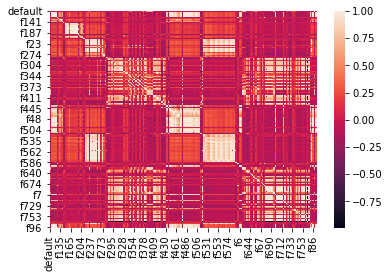

In [617]:
sns.heatmap(df.corr())

In [625]:
df1=df.corrwith(df.default).abs()
df1

default    1.000000
f1         0.145335
f10        0.148039
f105       0.105865
f106       0.105865
             ...   
f9         0.153770
f95        0.112487
f96        0.112487
f97        0.112487
f98        0.112487
Length: 483, dtype: float64

In [627]:
len(df1[df1>.2])

16

In [628]:
df2=df1[df1>.2]
df2=df2.to_frame()

In [629]:
df2=df[df2.index]
df2.head(2)

,default,f25,f26,f281,f282,f283,f376,f377,f378,f400,f443,f5,f516,f517,f67,f675
0,0,66,998046.0,2.63,2.90,2.88,69.07,67.24,67.8000,3,3.08405,3,5.1000,3.21,4.5785,3.0
1,0,50,754416.0,8.75,9.47,9.05,46.72,50.72,37.1667,10,8.85000,3,8.2195,8.87,4.5785,10.0


In [630]:
df2.shape

(20742, 16)

In [632]:
df3=df2.iloc[:,1:16]
df3.head(2)

,f25,f26,f281,f282,f283,f376,f377,f378,f400,f443,f5,f516,f517,f67,f675
0,66,998046.0,2.63,2.90,2.88,69.07,67.24,67.8000,3,3.08405,3,5.1000,3.21,4.5785,3.0
1,50,754416.0,8.75,9.47,9.05,46.72,50.72,37.1667,10,8.85000,3,8.2195,8.87,4.5785,10.0


In [633]:
df3.columns

Index(['f25', 'f26', 'f281', 'f282', 'f283', 'f376', 'f377', 'f378', 'f400',
       'f443', 'f5', 'f516', 'f517', 'f67', 'f675'],
      dtype='object')

### Base model without feature selection

In [634]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [635]:
import statsmodels.formula.api as sm
formula = 'default' + '~' + '+'.join(df2.columns.difference(['default']))

In [636]:
base = sm.logit(formula,data=df2)
result = base.fit()

Optimization terminated successfully.
         Current function value: 0.594375
         Iterations 5


In [637]:
 print(result.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.141     
Dependent Variable: default          AIC:              24689.0517
Date:               2021-03-24 01:43 BIC:              24816.0903
No. Observations:   20742            Log-Likelihood:   -12329.   
Df Model:           15               LL-Null:          -14344.   
Df Residuals:       20726            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept    -0.3627    0.1699   -2.1353  0.0327  -0.6957  -0.0298
f25          -0.0349    0.0135   -2.5832  0.0098  -0.0613  -0.0084
f26           0.0000    0.0000   11.0666  0.0000   0.0000   0.0000
f281         -0.0872    0.0378

In [638]:
df_gini = 2*metrics.roc_auc_score(df2['default'], result.predict(df2)) - 1
print("The Gini Index for the model built on the Data is : ", df_gini)

The Gini Index for the model built on the Data is :  0.48701853489263414


In [639]:
df_auc = metrics.roc_auc_score(df2['default'], result.predict(df2))
print("The AUC for the model built on the Train Data is : ", df_auc)

The AUC for the model built on the Train Data is :  0.7435092674463171


### Feature selection

#### F-regression, P-value

In [640]:
X = df2[df2.columns.difference(["default"])]
Y= df2["default"]

In [641]:
from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression(X,Y )
f_reg = pd.concat([pd.Series(X.columns), pd.Series(F_values), pd.Series(p_values)], axis=1)
f_reg.columns = ['Feature', 'F_Value', 'P_Value']
f_reg.sort_values('P_Value', ascending=True, inplace=True)
f_reg=f_reg.head(20)
f_reg

,Feature,F_Value,P_Value
5,f376,1368.244105,4.232369e-290
2,f281,1263.940291,8.721394e-269
6,f377,1243.340398,1.452720e-264
1,f26,1224.450450,1.088633e-260
10,f5,1174.353127,2.134160e-250
0,f25,1156.287863,1.113126e-246
13,f67,1013.457129,3.526914e-217
3,f282,1011.032644,1.121658e-216
7,f378,999.733835,2.467473e-214
14,f675,934.400101,9.146415e-201


#### RFE method

In [642]:
from sklearn.feature_selection import RFE

In [643]:
RFE_model = RFE(LogisticRegression(), n_features_to_select=15)

In [644]:
z1=df2[f_reg.Feature]

In [645]:
RFE_model= RFE_model.fit(z1,Y)

In [646]:
RFE_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [647]:
RFE_Col=z1.columns[list(RFE_model.get_support())]

In [648]:
RFE_Col=pd.DataFrame(RFE_Col)
RFE_Col.columns=["Feature"]
RFE_Col

,Feature
0,f376
1,f281
2,f377
3,f26
4,f5
5,f25
6,f67
7,f282
8,f378
9,f675


#### Check multi-collinearity using Variance Inflation Factor (VIF)

In [649]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [650]:
VIF = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [651]:
VIF_results = pd.concat([pd.Series(X.columns), pd.Series(VIF)], axis=1)
VIF_results.columns = ['Feature', 'VIF']
VIF_results.sort_values('VIF', ascending=True, inplace=True)
VIF_results.round()

,Feature,VIF
10,f5,3.0
13,f67,9.0
1,f26,43.0
7,f378,90.0
2,f281,224.0
11,f516,289.0
14,f675,498.0
5,f376,613.0
9,f443,921.0
8,f400,2032.0


In [652]:
vif=VIF_results.round().head(15)
vif

,Feature,VIF
10,f5,3.0
13,f67,9.0
1,f26,43.0
7,f378,90.0
2,f281,224.0
11,f516,289.0
14,f675,498.0
5,f376,613.0
9,f443,921.0
8,f400,2032.0


In [653]:
v1=RFE_Col.Feature.append(vif.Feature).drop_duplicates()
len(v1)

15

#### Variable reduction using Somer's D

In [654]:
somersd_df = pd.DataFrame()
for num_variable in v1:
    logreg = sm.logit(formula = str('default ~ ')+str(num_variable), data=df2)
    result = logreg.fit()
    #summ = result.summary2()
    y_score = pd.DataFrame(result.predict())
    y_score.columns = ['Score']
    somers_d = 2*metrics.roc_auc_score(df2['default'],y_score) - 1
    temp = pd.DataFrame([num_variable,somers_d]).T
    temp.columns = ['Variable', 'SomersD']
    somersd_df = pd.concat([somersd_df, temp], axis=0)

somersd_df

Optimization terminated successfully.
         Current function value: 0.659841
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.662060
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.662443
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.662997
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.664275
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.664318
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.667822
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.667755
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.668153
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.669501
  

,Variable,SomersD
0,f376,0.278864
0,f281,0.275605
0,f377,0.275003
0,f26,0.26914
0,f5,0.230296
0,f25,0.270236
0,f67,0.247879
0,f282,0.25542
0,f378,0.237541
0,f675,0.244793


In [655]:
som_col=somersd_df.sort_values(by='SomersD', ascending=False).head(15)
som_col

,Variable,SomersD
0,f376,0.278864
0,f281,0.275605
0,f377,0.275003
0,f25,0.270236
0,f26,0.26914
0,f282,0.25542
0,f67,0.247879
0,f675,0.244793
0,f400,0.243523
0,f378,0.237541


In [656]:
som=list(som_col.Variable)
som

['f376',
 'f281',
 'f377',
 'f25',
 'f26',
 'f282',
 'f67',
 'f675',
 'f400',
 'f378',
 'f517',
 'f443',
 'f516',
 'f283',
 'f5']

### Model building

#### Train-test split

In [657]:
from sklearn.model_selection import train_test_split

In [658]:
train, test = train_test_split(df2, test_size=0.3, random_state=1234)

In [659]:
formula ='default ~ '+ 'f281+f282+f377+f675+f400+f25+f376+f378+f26+f283+f517+f67+f443+f516+f5'

In [450]:
formula1 ='default ~ '+ 'f281+f32+f322+f323+f402+f629+f675+f677+f142+f768'

In [550]:
formula2 ='default ~ '+ 'f26+f281+f405+f378+f675+f322+f404+f766'

In [660]:
model= sm.logit(formula, data=train)
result1= model.fit()
print(result1.summary2())

Optimization terminated successfully.
         Current function value: 0.592836
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.143     
Dependent Variable: default          AIC:              17246.7807
Date:               2021-03-24 01:50 BIC:              17368.1121
No. Observations:   14519            Log-Likelihood:   -8607.4   
Df Model:           15               LL-Null:          -10039.   
Df Residuals:       14503            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept    -0.5123    0.2030   -2.5240  0.0116  -0.9101  -0.1145
f281         -0.1104    0.0452   -2.4403  0.0147  -0.1991  -0.

- LE = -1.0268-2.5719*f404-0.0034*f25-.078*f281-2.2642*f630+1.2393*f629+0.6845*f405+0.1566*f282+1.2716*f402+0.0181*f378-0.1337*f675
- p(Default=1) = exp(LE)/(1+exp(LE))

In [661]:
# concordance/somers'd/gini coefficient
train_gini = 2*metrics.roc_auc_score(train['default'], result1.predict(train)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(test['default'], result1.predict(test)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

The Gini Index for the model built on the Train Data is :  0.4905661512537498
The Gini Index for the model built on the Test Data is :  0.4772996081299312


In [662]:
#AUC 
train_auc = metrics.roc_auc_score(train['default'], result1.predict(train))
test_auc = metrics.roc_auc_score(test['default'], result1.predict(test))

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)

The AUC for the model built on the Train Data is :  0.7452830756268749
The AUC for the model built on the Test Data is :  0.7386498040649656


In [663]:
train_predicted_prob = pd.DataFrame(result1.predict(train))
train_predicted_prob.columns = ['prob']
train_actual = train['default']

train_predict = pd.concat([train_actual, train_predicted_prob], axis=1)
train_predict.columns = ['actual','prob']
train_predict.head()

,actual,prob
56306,1,0.802686
74718,1,0.466986
5003,0,0.546921
7273,0,0.394427
19849,1,0.379873


In [664]:
test_predicted_prob = pd.DataFrame(result.predict(test))
test_predicted_prob.columns = ['prob']
test_actual = test['default']

test_predict = pd.concat([test_actual, test_predicted_prob], axis=1)
test_predict.columns = ['actual','prob']
test_predict.head()

,actual,prob
102841,1,0.541871
5729,0,0.527511
3962,0,0.426162
1478,1,0.651577
11137,0,0.534698


In [665]:
train_predict['predicted'] = train_predict['prob'].apply(lambda x: 0.0 if x < 0.5 else 1.0)

In [666]:
train_predict.head()

,actual,prob,predicted
56306,1,0.802686,1.0
74718,1,0.466986,0.0
5003,0,0.546921,1.0
7273,0,0.394427,0.0
19849,1,0.379873,0.0


In [667]:
train_predict['tp'] = train_predict.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==1 else 0.0, axis=1)
train_predict['fp'] = train_predict.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==1 else 0.0, axis=1)
train_predict['tn'] = train_predict.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==0 else 0.0, axis=1)
train_predict['fn'] = train_predict.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==0 else 0.0, axis=1)

In [668]:
train_predict.head(10)

,actual,prob,predicted,tp,fp,tn,fn
56306,1,0.802686,1.0,1.0,0.0,0.0,0.0
74718,1,0.466986,0.0,0.0,0.0,0.0,1.0
5003,0,0.546921,1.0,0.0,1.0,0.0,0.0
7273,0,0.394427,0.0,0.0,0.0,1.0,0.0
19849,1,0.379873,0.0,0.0,0.0,0.0,1.0
60578,1,0.856451,1.0,1.0,0.0,0.0,0.0
11030,0,0.528100,1.0,0.0,1.0,0.0,0.0
100234,1,0.597274,1.0,1.0,0.0,0.0,0.0
827,0,0.596282,1.0,0.0,1.0,0.0,0.0
1984,0,0.229077,0.0,0.0,0.0,1.0,0.0


In [669]:
#true prediction rate
accuracy = (train_predict.tp.sum()+train_predict.tn.sum())/(train_predict.tp.sum()+train_predict.tn.sum()+train_predict.fp.sum()+train_predict.fn.sum())
accuracy

0.6814518906260761

In [670]:
# true positive rate
Sensitivity = (train_predict.tp.sum())/(train_predict.tp.sum()+train_predict.fn.sum())
Sensitivity

0.6308862240421176

In [671]:
# true negative rate
Specificity = (train_predict.tn.sum())/(train_predict.tn.sum()+train_predict.fp.sum())
Specificity

0.726467907824502

In [672]:
#false positive rate
1-Specificity

0.273532092175498

In [673]:
np.linspace(0,1,50)

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

In [674]:
## Intuition behind ROC curve - confusion matrix for each different cut-off shows trade off in sensitivity and specificity
roc_like_df = pd.DataFrame()
train_temp = train_predict.copy()

for cut_off in np.linspace(0,1,50):
    train_temp['cut_off'] = cut_off
    train_temp['predicted'] = train_temp['prob'].apply(lambda x: 0.0 if x < cut_off else 1.0)
    train_temp['tp'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['fp'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['tn'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==0 else 0.0, axis=1)
    train_temp['fn'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==0 else 0.0, axis=1)
    sensitivity = train_temp['tp'].sum() / (train_temp['tp'].sum() + train_temp['fn'].sum())
    specificity = train_temp['tn'].sum() / (train_temp['tn'].sum() + train_temp['fp'].sum())
    accuracy = (train_temp['tp'].sum()  + train_temp['tn'].sum() ) / (train_temp['tp'].sum() + train_temp['fn'].sum() + train_temp['tn'].sum() + train_temp['fp'].sum())
    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity, accuracy]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity', 'accuracy']
    roc_like_df = pd.concat([roc_like_df, roc_like_table], axis=0)

In [675]:
roc_like_df

,cutoff,sensitivity,specificity,accuracy
0,0.000000,1.000000,0.000000,0.470969
0,0.020408,1.000000,0.000000,0.470969
0,0.040816,1.000000,0.000130,0.471038
0,0.061224,1.000000,0.002213,0.472140
0,0.081633,0.999561,0.011327,0.476755
0,0.102041,0.997221,0.027601,0.484262
0,0.122449,0.992249,0.051426,0.494524
0,0.142857,0.988886,0.080198,0.508162
0,0.163265,0.981574,0.115350,0.523314
0,0.183673,0.973092,0.158052,0.541911


### Finding ideal cut-off 

In [676]:
roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity']

In [677]:
#Cut-off based on highest sum(sensitivity+specicity)
roc_like_df[roc_like_df['total']==roc_like_df['total'].max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.489796,0.646827,0.711626,0.681108,1.358453


In [678]:
#Cut-off based on highest accuracy
roc_like_df[roc_like_df['accuracy']==roc_like_df['accuracy'].max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.510204,0.616262,0.740268,0.681865,1.35653


In [685]:
#cut-off=.51
test_predict['predicted'] = test_predict['prob'].apply(lambda x: 1 if x > 0.51 else 0)
train_predict['predicted'] = train_predict['prob'].apply(lambda x: 1 if x > 0.51 else 0)

#### Confusion matrix 

In [686]:
pd.crosstab(train_predict['actual'], train_predict['predicted'])

predicted,0,1
actual,,
0,5685,1996
1,2623,4215


In [687]:
pd.crosstab(test_predict['actual'], test_predict['predicted'])

predicted,0,1
actual,,
0,2328,950
1,1626,1319


In [688]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(train_predict.actual, train_predict.predicted))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(test_predict.actual, test_predict.predicted))

The overall accuracy score for the Train Data is :  0.6818651422274261
The overall accuracy score for the Test Data  is :  0.5860517435320585


In [689]:
# Precision, recall, f1-score, weighted avg
print(metrics.classification_report(train_predict.actual, train_predict.predicted))

              precision    recall  f1-score   support

           0       0.68      0.74      0.71      7681
           1       0.68      0.62      0.65      6838

    accuracy                           0.68     14519
   macro avg       0.68      0.68      0.68     14519
weighted avg       0.68      0.68      0.68     14519



In [690]:
print(metrics.classification_report(test_predict.actual, test_predict.predicted))

              precision    recall  f1-score   support

           0       0.59      0.71      0.64      3278
           1       0.58      0.45      0.51      2945

    accuracy                           0.59      6223
   macro avg       0.59      0.58      0.57      6223
weighted avg       0.59      0.59      0.58      6223



### Model Validation
Decile analysis 
#Top-two deciles - High risk customers - will reject applications
#3rd,4th, 5th deciesl - medium risk customers - will accept application with proper scrutiny
#6th decile onwards - low risk customers - accept the applications

In [691]:
train_predict['Deciles']=pd.qcut(train_predict['prob'],10, labels=False)
train_predict.head()

,actual,prob,predicted,tp,fp,tn,fn,Deciles
56306,1,0.802686,1,1.0,0.0,0.0,0.0,9
74718,1,0.466986,0,0.0,0.0,0.0,1.0,5
5003,0,0.546921,1,0.0,1.0,0.0,0.0,6
7273,0,0.394427,0,0.0,0.0,1.0,0.0,3
19849,1,0.379873,0,0.0,0.0,0.0,1.0,3


In [692]:
test_predict['Deciles']=pd.qcut(test_predict['prob'],10, labels=False,duplicates = 'drop')

test_predict.head()

,actual,prob,predicted,Deciles
102841,1,0.541871,1,7
5729,0,0.527511,1,6
3962,0,0.426162,0,3
1478,1,0.651577,1,9
11137,0,0.534698,1,7


In [693]:
no_1s = train_predict[['Deciles','actual']].groupby(train_predict.Deciles).sum().sort_index(ascending=False)['actual']
no_total = train_predict[['Deciles','actual']].groupby(train_predict.Deciles).count().sort_index(ascending=False)['actual']
max_prob = train_predict[['Deciles','prob']].groupby(train_predict.Deciles).max().sort_index(ascending=False)['prob']
min_prob = train_predict[['Deciles','prob']].groupby(train_predict.Deciles).min().sort_index(ascending=False)['prob']

In [694]:
Decile_analysis_train = pd.concat([ min_prob, max_prob, no_1s, no_total-no_1s, no_total], axis=1)
Decile_analysis_train.columns = ['Min_prob', 'Max_prob', '#1', '#0', 'Total']

In [695]:
Decile_analysis_train

,Min_prob,Max_prob,#1,#0,Total
Deciles,,,,,
9,0.773633,0.954969,1225,227,1452
8,0.679443,0.773514,1068,384,1452
7,0.600851,0.679427,901,551,1452
6,0.529990,0.600749,805,647,1452
5,0.461237,0.529971,705,746,1451
4,0.396638,0.461227,631,821,1452
3,0.329112,0.396604,520,932,1452
2,0.260804,0.329081,449,1003,1452
1,0.186221,0.260683,342,1110,1452


In [696]:
dec_train.to_csv('Decile_analysis_train_4.csv')

In [697]:
# Decile Analysis for test data

no_1s = test_predict[['Deciles','actual']].groupby(test_predict.Deciles).sum().sort_index(ascending=False)['actual']
no_total = test_predict[['Deciles','actual']].groupby(test_predict.Deciles).count().sort_index(ascending=False)['actual']
max_prob = test_predict[['Deciles','prob']].groupby(test_predict.Deciles).max().sort_index(ascending=False)['prob']
min_prob = test_predict[['Deciles','prob']].groupby(test_predict.Deciles).min().sort_index(ascending=False)['prob']

Decile_analysis_test = pd.concat([min_prob, max_prob, no_1s, no_total-no_1s, no_total], axis=1)

Decile_analysis_test.columns = ['Min_prob', 'Max_prob', '#1', '#0', 'Total']

Decile_analysis_test

,Min_prob,Max_prob,#1,#0,Total
Deciles,,,,,
9,0.612184,0.651577,386,237,623
8,0.562388,0.611756,375,242,617
7,0.530208,0.561944,351,271,622
6,0.500931,0.529758,313,310,623
5,0.475246,0.500480,299,320,619
4,0.449245,0.474796,282,344,626
3,0.418680,0.448798,270,355,625
2,0.383171,0.418242,252,366,618
1,0.328666,0.382744,240,385,625


In [699]:
dec_test.to_csv('Decile_analysis_test_4.csv')

#### Check KS score , lift for decile analysis - train & test 
#KS = diff. of cumulative actual 1's & cumulative actual 0's.
#Ideally, it should be in first three deciles and score should lie between 40 and 70 to validate the model as a good fit 
#lift tells % of defaulters captured in first decile against 10% of population

In [568]:
# scoring for new dataset - test.csv,assume data_new
data_new["default_prob"]=result1.predict(data_new)

NameError: name 'data_new' is not defined